### Time Series Analysis to Forecast Appliances Energy Use by Using Facebook Prophet

- This project is made to forecast appliances energy use by using Facebook Prophet.


- Brief information about the data:

*"The data set is at 10 min for about 4.5 months. The energy data was logged every 10 minutes with m-bus energy meters." 

*"date time year-month-day hour:minute:second
 Appliances: energy use in Wh"
 
 -Data Source:Luis M. Candanedo, Veronique Feldheim, Dominique Deramaix, Data driven prediction models of energy use of appliances in a low-energy house, Energy and Buildings, Volume 140, 1 April 2017, Pages 81-97, ISSN 0378-7788
 https://archive.ics.uci.edu/ml/datasets/Appliances+energy+prediction#
 
 
 

Stan code 

In [1]:

import pystan

libraries

In [2]:
%matplotlib inline
import os
import pandas as pd
import numpy as np
from fbprophet import Prophet

First we’ll import the data:

In [3]:

df = pd.read_csv("../input/energydata/energydata_complete.csv")

In [5]:
df.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,...,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,...,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


The below two variables wil be used in the analyeses

In [6]:

dfnew = df[['date','Appliances']]
dfnew.head()


,date,Appliances
0,2016-01-11 17:00:00,60
1,2016-01-11 17:10:00,60
2,2016-01-11 17:20:00,50
3,2016-01-11 17:30:00,50
4,2016-01-11 17:40:00,60


In [7]:
dfnew.columns = ['ds', 'y']

In [8]:
dfnew.head()

,ds,y
0,2016-01-11 17:00:00,60
1,2016-01-11 17:10:00,60
2,2016-01-11 17:20:00,50
3,2016-01-11 17:30:00,50
4,2016-01-11 17:40:00,60


Visualization

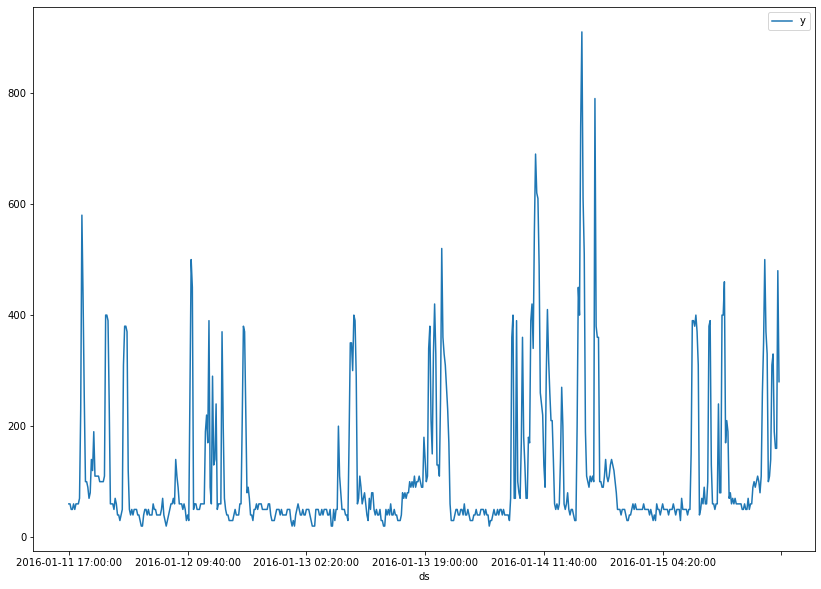

In [10]:
dfnew.set_index('ds').plot(figsize=(14,10))

transforming the data

In [11]:

np.log(dfnew['y']).head()

0    4.094345
1    4.094345
2    3.912023
3    3.912023
4    4.094345
Name: y, dtype: float64

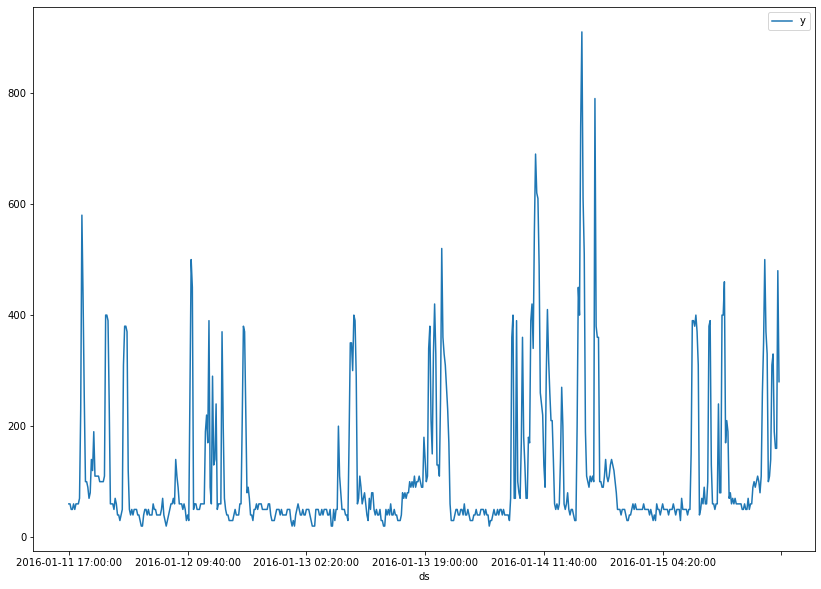

In [12]:
dfnew.set_index('ds').plot(figsize=(14,10))

fitting the model by instantiating a new Prophet object. 

In [13]:
m = Prophet()
m.fit(dfnew)

prameters of the m

In [14]:

m.params

{'k': array([[0.05692421]]),
 'm': array([[0.09298293]]),
 'delta': array([[-1.21567053e-08, -9.25891245e-09, -1.92028716e-09,
          4.45806213e-10,  4.31992998e-09,  1.44634837e-08,
          1.18696792e-03,  2.23332400e-03,  5.73217378e-03,
          4.37558441e-03,  1.94079273e-03,  3.16822583e-03,
          1.96231055e-03,  1.49541861e-06,  1.38063039e-08,
          2.47558665e-09, -1.48161003e-09, -1.72771997e-09,
         -1.58154067e-08, -5.51412979e-03, -2.91846402e-02,
         -1.51036456e-02, -2.51628100e-05, -2.89365822e-08,
         -5.68901680e-10]]),
 'sigma_obs': array([[0.1281117]]),
 'beta': array([[-0.03325604, -0.0330732 , -0.05504669,  0.00361089,  0.03213917,
         -0.01484289,  0.00149432, -0.00094205]]),
 'trend': array([[0.09298293, 0.09307812, 0.09317331, 0.0932685 , 0.09336369,
         0.09345888, 0.09355407, 0.09364926, 0.09374446, 0.09383965,
         0.09393484, 0.09403003, 0.09412522, 0.09422041, 0.0943156 ,
         0.09441079, 0.09450598, 0.0946

In [15]:
future = m.make_future_dataframe(periods=10)
future.tail()

,ds
604,2016-01-21 20:40:00
605,2016-01-22 20:40:00
606,2016-01-23 20:40:00
607,2016-01-24 20:40:00
608,2016-01-25 20:40:00


In [16]:
future = m.make_future_dataframe(periods=5)
future.tail()

,ds
599,2016-01-16 20:40:00
600,2016-01-17 20:40:00
601,2016-01-18 20:40:00
602,2016-01-19 20:40:00
603,2016-01-20 20:40:00


In [17]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()


,ds,yhat,yhat_lower,yhat_upper
599,2016-01-16 20:40:00,191.580518,36.397465,335.583585
600,2016-01-17 20:40:00,197.649876,54.268839,347.278422
601,2016-01-18 20:40:00,203.719235,48.376503,355.748131
602,2016-01-19 20:40:00,209.788593,63.038866,361.650681
603,2016-01-20 20:40:00,215.857951,69.864076,372.155517


plotting the forecast 

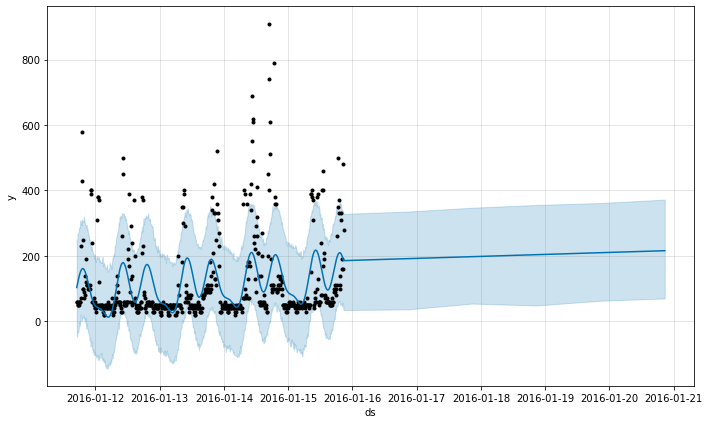

In [18]:
fig1 = m.plot(forecast)


 forecast components

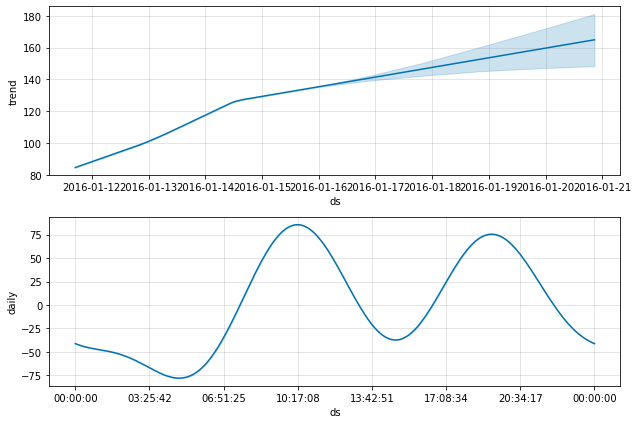

In [19]:
fig2 = m.plot_components(forecast)

interactive figure of the forecast and components 

In [20]:
from fbprophet.plot import plot_plotly, plot_components_plotly

plot_plotly(m, forecast)

In [21]:
plot_components_plotly(m, forecast)

In [22]:
forecast1 = m.predict(future)
forecast1[['ds', 'yhat']].tail()

,ds,yhat
599,2016-01-16 20:40:00,191.580518
600,2016-01-17 20:40:00,197.649876
601,2016-01-18 20:40:00,203.719235
602,2016-01-19 20:40:00,209.788593
603,2016-01-20 20:40:00,215.857951


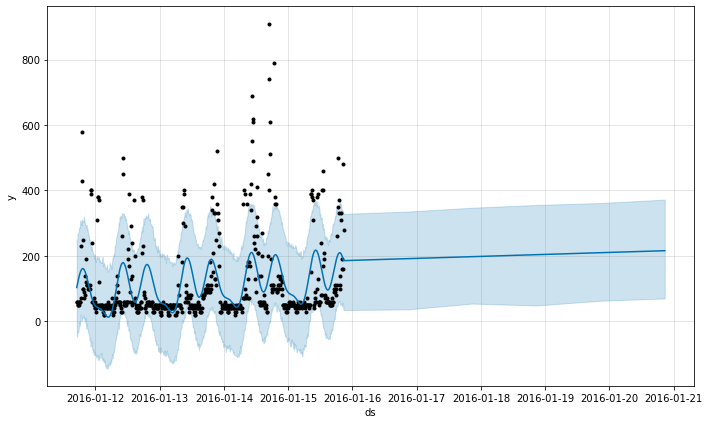

In [23]:
fig3 = m.plot(forecast)

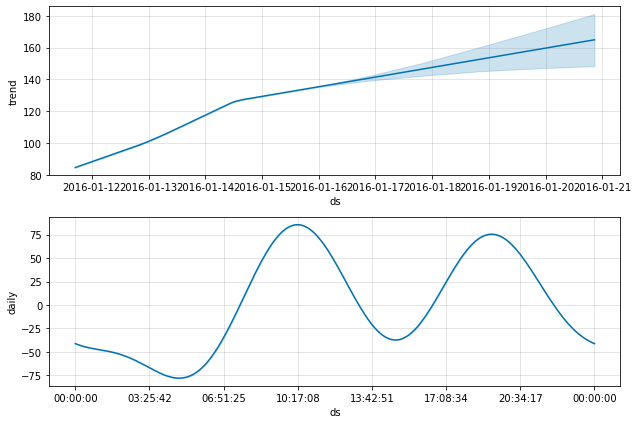

In [24]:
fig4 = m.plot_components(forecast)

In [25]:
from fbprophet.plot import plot_plotly, plot_components_plotly

plot_plotly(m, forecast)

In [26]:
plot_components_plotly(m, forecast)
